# Lab05 Python Data Science with Pandas

## Please submit your finished lab05 jupyter notebook via pull request in GitHub

In [3]:
# magic command to display matplotlib plots inline within the ipython notebook webpage
%matplotlib inline

# import necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Part 1 <br /> Basics of Selecting and Slicing Data

In [4]:
# create a pandas dataframe from the location data set
df = pd.read_csv('data/summer-travel-gps-full.csv')
df.head()

,lat,lon,date,city,country
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom


In [41]:
# Q1: how to get 2 columns from the dataframe (city and country)?

To get a single "cell's" value out of a dataframe, pass a column name, then a row label. This is equivalent to slicing the dataframe down to a single series, then slicing a single value out of that series using [ ] indexing.

In [5]:
df [["city", "country"]]

,city,country
0,West Drayton,United Kingdom
1,Hounslow,United Kingdom
2,Hounslow,United Kingdom
3,Hounslow,United Kingdom
4,Hounslow,United Kingdom
...,...,...
1754,Munich,Germany
1755,Munich,Germany
1756,Munich,Germany
1757,Munich,Germany


In [52]:
# Q2: how to get the first 5 rows of the "city" column?

In [101]:
df.loc [[0,1,2,3,4], ["city"]]

,city
0,West Drayton
1,Hounslow
2,Hounslow
3,Hounslow
4,Hounslow


### Using .loc[ ]

In [53]:
# Q3: how to use .loc to select the third row of the dataframe?

In [102]:
df.loc [[2]]

,lat,lon,date,city,country,munich
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom,False


In [54]:
# Q4: how to use .loc to select the first row in "country" column?

In [18]:
df.loc [[1], ["country"]]

,country
1,United Kingdom


In [55]:
# Q5: how to select the first 4 rows of ['city', 'date'] columns?

In [20]:
df.loc [[0,1,2,3],["city", "date"]]

,city,date
0,West Drayton,05/14/2014 09:07
1,Hounslow,05/14/2014 09:22
2,Hounslow,05/14/2014 10:51
3,Hounslow,05/14/2014 11:24


### Using .iloc[ ]

In [56]:
# use .iloc for integer position based indexing
# Q6: how to get the value from the row in position 3 and the column in position 2

In [103]:
df.iloc [[2],[1]]

,lon
2,-0.446081


In [57]:
# Q7: how to use iloc to select every 300th row from a data set

In [105]:
df.iloc [::300]

,lat,lon,date,city,country,munich
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,False
300,41.377091,2.151175,05/20/2014 03:18,Barcelona,Spain,False
600,50.052338,19.946220,05/31/2014 21:10,Krakow,Poland,False
900,48.561181,9.059672,06/09/2014 15:12,Tübingen,Germany,False
1200,41.378301,2.187443,06/17/2014 16:37,Barcelona,Spain,False
1500,42.208201,20.735993,06/30/2014 08:27,Prizren,Kosovo,False


## Part 2 <br /> How to select rows by some value(s)

In [58]:
# load a reduced set of gps data
df = pd.read_csv('data/summer-travel-gps-simplified.csv')
df.tail()

,lat,lon,date,city,country
173,41.044556,28.983286,07/08/2014 16:44,Istanbul,Turkey
174,41.008992,28.968268,07/08/2014 20:03,Istanbul,Turkey
175,41.043487,28.985488,07/08/2014 22:18,Istanbul,Turkey
176,40.977637,28.823879,07/09/2014 09:03,Istanbul,Turkey
177,48.357110,11.791346,07/09/2014 13:20,Munich,Germany


In [59]:
# Q9: create a Series of true/false, indicating if each "city" row in the column is equal to "Munich"

In [40]:
df["munich"] = [city == "Munich" for city in df ["city"]]
df

,lat,lon,date,city,country,munich
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,False
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom,False
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom,False
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom,False
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom,False
...,...,...,...,...,...,...
1754,48.356013,11.791710,07/09/2014 13:13,Munich,Germany,True
1755,48.356529,11.792183,07/09/2014 13:14,Munich,Germany,True
1756,48.356285,11.791710,07/09/2014 13:17,Munich,Germany,True
1757,48.355328,11.791710,07/09/2014 13:18,Munich,Germany,True


In [60]:
# pandas logical operators are: | for or, & for and, ~ for not
# these must be grouped by using parentheses

# Q10: what cities were visited in spain that were not barcelona? Create a dataframe for it. 

In [108]:
sp_cities = df.loc[(df["country"] == 'Spain') & (df["city"]!= "Barcelona")]
print(sp_cities)

            lat       lon              date                     city country  \
263   41.303911  2.105931  05/18/2014 22:35     El Prat de Llobregat   Spain   
264   41.292723  2.075583  05/18/2014 22:49               Viladecans   Spain   
265   41.289946  2.064590  05/18/2014 23:04               Viladecans   Spain   
266   41.294143  2.073177  05/18/2014 23:20               Viladecans   Spain   
267   41.320125  2.090935  05/18/2014 23:34     El Prat de Llobregat   Spain   
1012  41.306752  2.097624  06/12/2014 17:19     El Prat de Llobregat   Spain   
1013  41.312086  2.077921  06/12/2014 17:35     El Prat de Llobregat   Spain   
1014  41.304333  2.072728  06/12/2014 17:49     El Prat de Llobregat   Spain   
1015  41.354599  2.122235  06/12/2014 18:04  Hospitalet de Llobregat   Spain   
1033  41.359580  2.128153  06/13/2014 11:05  Hospitalet de Llobregat   Spain   
1034  41.359702  2.130125  06/13/2014 11:19  Hospitalet de Llobregat   Spain   
1035  41.358460  2.128701  06/13/2014 11

In [60]:
# Q11: select rows where either the city is munich, or the country is serbia

In [110]:
df.loc[(df["city"] == "Munich") | (df["country"]=="Serbia")]

,lat,lon,date,city,country,munich
1362,44.821164,20.289821,06/21/2014 01:59,Belgrade,Serbia,False
1363,44.814263,20.463396,06/21/2014 02:29,Belgrade,Serbia,False
1364,44.814237,20.463395,06/21/2014 04:29,Belgrade,Serbia,False
1365,44.814260,20.463441,06/21/2014 05:30,Belgrade,Serbia,False
1366,44.814255,20.463413,06/21/2014 08:00,Belgrade,Serbia,False
1367,44.814763,20.462994,06/21/2014 10:14,Belgrade,Serbia,False
1368,44.814257,20.463436,06/21/2014 13:29,Belgrade,Serbia,False
1369,44.814246,20.463423,06/21/2014 13:45,Belgrade,Serbia,False
1370,44.814242,20.463396,06/21/2014 15:29,Belgrade,Serbia,False
1371,44.817690,20.464091,06/21/2014 17:29,Belgrade,Serbia,False


In [62]:
# Q12: how many observations are west of the prime meridian?

In [111]:
df.loc[df["lon"] <0]

,lat,lon,date,city,country,munich
0,51.481292,-0.451011,05/14/2014 09:07,West Drayton,United Kingdom,False
1,51.474005,-0.450999,05/14/2014 09:22,Hounslow,United Kingdom,False
2,51.478199,-0.446081,05/14/2014 10:51,Hounslow,United Kingdom,False
3,51.478199,-0.446081,05/14/2014 11:24,Hounslow,United Kingdom,False
4,51.474146,-0.451562,05/14/2014 11:38,Hounslow,United Kingdom,False
...,...,...,...,...,...,...
258,41.161528,-8.630898,05/18/2014 18:40,Porto,Portugal,False
259,41.237025,-8.665684,05/18/2014 18:55,Maia Municipality,Portugal,False
260,41.236446,-8.671165,05/18/2014 19:25,Matosinhos,Portugal,False
261,41.237205,-8.672173,05/18/2014 19:55,Maia,Portugal,False


In [63]:
# Q13: get all rows that contain a city that starts with the letter G

In [114]:
df.loc[df["city"].str.startswith("G")]

,lat,lon,date,city,country,munich
659,50.273632,18.729429,06/02/2014 06:39,Gliwice,Poland,False
660,50.273632,18.729429,06/02/2014 06:55,Gliwice,Poland,False
942,48.282940,8.199630,06/10/2014 13:33,Gutach,Germany,False
943,48.389029,8.021342,06/10/2014 13:48,Gengenbach,Germany,False
1575,40.187827,20.079304,07/04/2014 17:39,Gjirokastër,Albania,False
1576,40.187825,20.079303,07/04/2014 17:42,Gjirokastër,Albania,False


In [64]:
# Q14: how many unique cities and countries in the dataset? 
# Also can you check missing values for the dataframe

In [80]:
df.isnull()

,lat,lon,date,city,country,munich,spanish_cities_no_Barcelona
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1754,False,False,False,False,False,False,False
1755,False,False,False,False,False,False,False
1756,False,False,False,False,False,False,False
1757,False,False,False,False,False,False,False


In [70]:
# Q15: group by country name and show the city names in each of the country

In [133]:
group_by = df.groupby(["country","city"])
print(group_by.count())

                                                   lat  lon  date  munich
country                city                                              
Albania                Berat                        27   27    27      27
                       Gjirokastër                   2    2     2       2
Bosnia and Herzegovina Herzegovina-Neretva Canton    2    2     2       2
                       Mostar                        9    9     9       9
                       Sarajevo                     15   15    15      15
...                                                ...  ...   ...     ...
Spain                  Hospitalet de Llobregat       4    4     4       4
                       Viladecans                    4    4     4       4
Turkey                 Istanbul                     94   94    94      94
United Kingdom         Hounslow                      6    6     6       6
                       West Drayton                  1    1     1       1

[113 rows x 4 columns]


## Part 3 <br /> How to select based on a date-time values

In [95]:
# load the location data set, indexed by the date field
# and, parse the dates so they're no longer strings but now rather Python datetime objects
# this lets us do date and time based operations on the data set
dt = pd.read_csv('data/summer-travel-gps-full.csv', index_col='date', parse_dates=True)
dt.head()

,lat,lon,city,country
date,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom


In [94]:
# Q16: is the timestamp index unique? How can you use code to find it? 

In [124]:
dt.index.is_unique

False

In [71]:
# Q17: drop duplicate index 

In [123]:
dt.dropna()

,lat,lon,city,country,weekday
date,,,,,
2014-05-14 09:07:00,51.481292,-0.451011,West Drayton,United Kingdom,Wednesday
2014-05-14 09:22:00,51.474005,-0.450999,Hounslow,United Kingdom,Wednesday
2014-05-14 10:51:00,51.478199,-0.446081,Hounslow,United Kingdom,Wednesday
2014-05-14 11:24:00,51.478199,-0.446081,Hounslow,United Kingdom,Wednesday
2014-05-14 11:38:00,51.474146,-0.451562,Hounslow,United Kingdom,Wednesday
...,...,...,...,...,...
2014-07-09 13:13:00,48.356013,11.791710,Munich,Germany,Wednesday
2014-07-09 13:14:00,48.356529,11.792183,Munich,Germany,Wednesday
2014-07-09 13:17:00,48.356285,11.791710,Munich,Germany,Wednesday


In [72]:
# Q18: create a weekday and a weekend dataframe

In [142]:
dt["weekday"] = [day.strftime("%A") for day in dt.index]
weekday = dt[dt.index.weekday.isin(range(5))]
weekend = dt[dt.index.weekday.isin([5,6])]
print(weekday)
print(weekend)

                           lat        lon          city         country  \
date                                                                      
2014-05-14 09:07:00  51.481292  -0.451011  West Drayton  United Kingdom   
2014-05-14 09:22:00  51.474005  -0.450999      Hounslow  United Kingdom   
2014-05-14 10:51:00  51.478199  -0.446081      Hounslow  United Kingdom   
2014-05-14 11:24:00  51.478199  -0.446081      Hounslow  United Kingdom   
2014-05-14 11:38:00  51.474146  -0.451562      Hounslow  United Kingdom   
...                        ...        ...           ...             ...   
2014-07-09 13:13:00  48.356013  11.791710        Munich         Germany   
2014-07-09 13:14:00  48.356529  11.792183        Munich         Germany   
2014-07-09 13:17:00  48.356285  11.791710        Munich         Germany   
2014-07-09 13:18:00  48.355328  11.791710        Munich         Germany   
2014-07-09 13:20:00  48.357110  11.791346        Munich         Germany   

                       w

In [128]:
# Q19: calculate and plot the number of observations each day of the week has

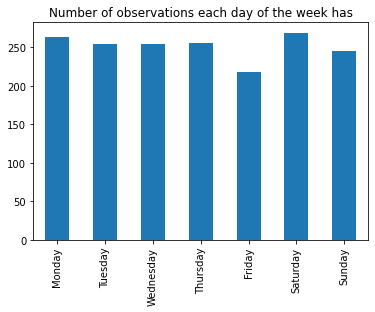

In [141]:
dt.weekday.value_counts().loc[["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]].plot(kind="bar", title = "Number of observations each day of the week has")
plt.show()